# Hands On Python 3 - Datenaufbereitung
Dieses Notebook zeigt wie
- man Daten aus zwei csv Dateien zu einem Datensatz zusammenfügen kann
- wie man mit nicht existenten Werten (NaN - Not a Number) umgeht
- wie man Zeitreihen mit unterschiedlichen Frequenzen auf eine gemeinsame Frequenz bringen kann

## Notwendige Bibliotheken importieren

In [1]:
# notwendige Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

## Daten einlesen

In [2]:
# Daten einlesen

# Daten der 1. Quelle
#rawData1 = pd.read_csv('/content/drive/My Drive/source1.csv')
rawData1 = pd.read_csv("source1.csv")
# Lesen Sie die Daten der 2. Quelle ein
#rawData2 = pd.read_csv('/content/drive/My Drive/source2.csv')
rawData2 = pd.read_csv("source2.csv")

In [3]:
# Anzahl der Zeilen und Spalten ausgeben
rawData1.shape

(135, 5)

In [4]:
rawData2.shape

(45, 2)

In [5]:
# Geben Sie Zeilen und Spalten des 1. Datensatzes von Quelle 1 aus
rawData1.iloc[0]

Date         2015-02-02 14:15:00
Energy                 26.285636
Light                 527.283333
CO2                   785.951515
Occupancy                    1.0
Name: 0, dtype: object

In [6]:
# Geben Sie Zeilen und Spalten des 2. Datensatzes von Quelle 2 aus
rawData2.iloc[1]

Date           2015-02-02 15:00:00
Temperature               23.29395
Name: 1, dtype: object

In [7]:
# Geben Sie die ersten Zeilen von Quelle 1 aus:
rawData1.head(1)

,Date,Energy,Light,CO2,Occupancy
0,2015-02-02 14:15:00,26.285636,527.283333,785.951515,1.0


In [8]:
# Geben Sie die ersten Zeilen von Quelle 2 aus:
rawData2.head(1)

,Date,Temperature
0,2015-02-02 14:00:00,23.657118


In [9]:
# Geben Sie die letzten Zeilen von Quelle 1 aus:
rawData1.tail(1)

,Date,Energy,Light,CO2,Occupancy
134,2015-02-03 23:45:00,24.94125,0.0,553.130952,0.0


In [10]:
# Geben Sie die letzten Zeilen von Quelle 2 aus
rawData2.tail(1)

,Date,Temperature
44,2015-02-04 10:00:00,23.946885


## Daten auf fehlende Werte hin überprüfen

In [11]:
# Geben Sie sich die Anzahl der NaNs in den Spalten von Quelle 2 aus:
rawData2.isna().sum()

Date           0
Temperature    0
dtype: int64

In [12]:
# Sofern der Datensatz keine NaNs erhält --> Kopie der Rohdaten namens data2 erstellen und damit direkt weiterarbeiten:
data2 = rawData2.copy()

In [13]:
# Wie sieht es bei rawData1 aus? Geben Sie für rawData1 die Anzahl der NaNs in den Spalten aus
rawData1.isna().sum()

Date          0
Energy        0
Light        10
CO2           0
Occupancy     0
dtype: int64

## Mit NaNs umgehen

### Möglichkeit 1: alle Zeilen, in denen mindestens 1x NaN vorkommt, löschen

In [14]:
# Kopie der Rohdaten anlegen
data1_del = rawData1.copy() 

# Zeilen mit mind. 1x NaN löschen (d.h. in irgendeiner Spalte kommt ein NaN vor --> Zeile wird gelöscht)
data1_del.dropna(inplace=True)

# Überprüfen
data1_del.isna().sum()

Date         0
Energy       0
Light        0
CO2          0
Occupancy    0
dtype: int64

### Möglichkeit 2: Fehlende Werte durch interpolierte Werte ersetzen

### Linear Interpolieren

In [15]:
# Führen Sie eine lineare Interpolation durch. Erstellen Sie sich dazu zunächst data1_ip als Kopie von rawData1
data1_ip = rawData1.copy()
data1_ip.interpolate(inplace=True)

In [16]:
# Geben Sie sich die Anzahl an NaN in den Spalten nach der Interpolation aus:
data1_ip.isna().sum()

Date         0
Energy       0
Light        0
CO2          0
Occupancy    0
dtype: int64

<AxesSubplot: >

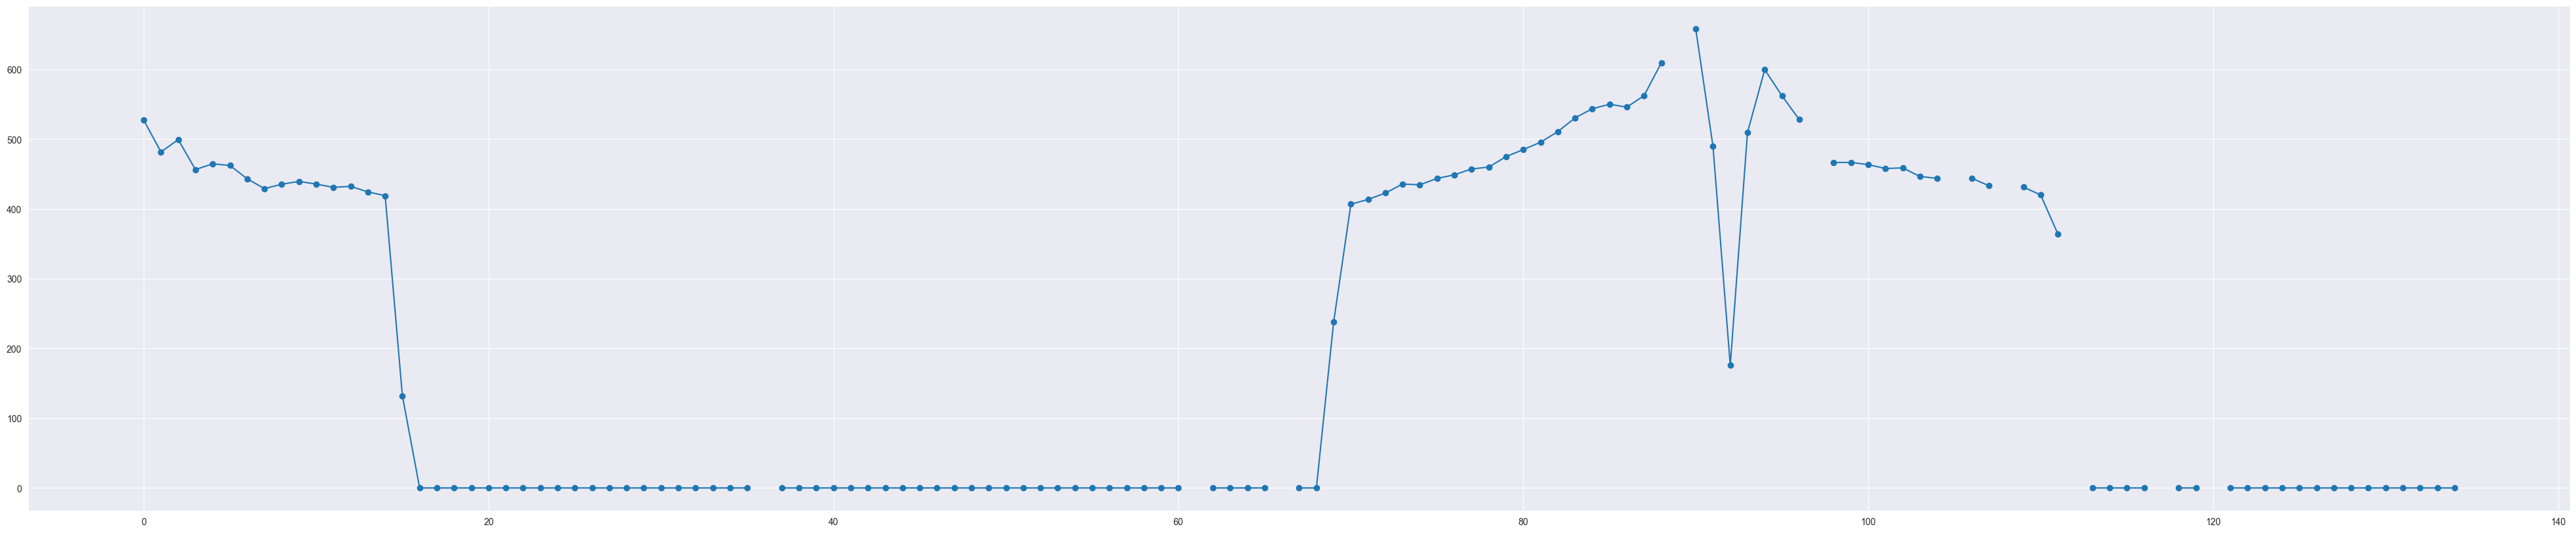

In [17]:
# Plotten der alten Zeitreihe
plt.figure(figsize=(50, 10))
rawData1['Light'].plot(marker='o')   

<AxesSubplot: >

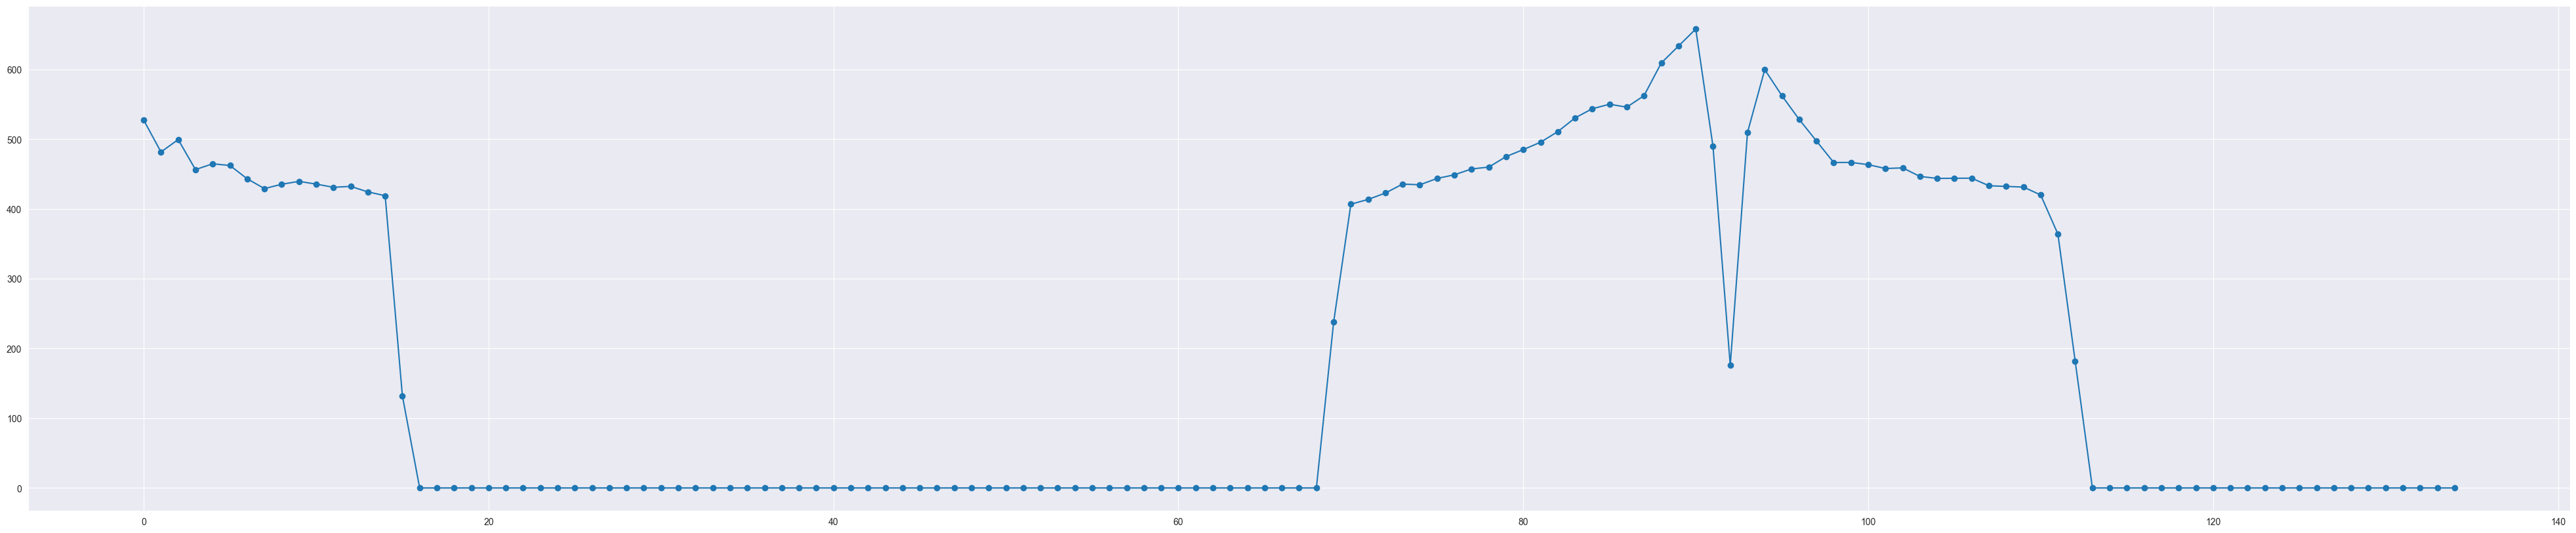

In [18]:
#neue Zeitreihe mit interpolierten Werten plotten
plt.figure(figsize=(50, 10))
data1_ip['Light'].plot(marker='o')

Wie zufrieden sind Sie mit der Interpolation?


....

In [19]:
# Grundsätzlich ist auch möglich mit Polynomfunktionen zu interpolieren.
# Interpolieren Sie quadratisch (method='polynomial', order=2)
data1_pp = rawData1.copy()
data1_pp.interpolate(method='polynomial', order=2, inplace=True)

In [20]:
# Anzahl an NaN in Spalten ausgeben
data1_pp.isna().sum()

Date         0
Energy       0
Light        0
CO2          0
Occupancy    0
dtype: int64

<AxesSubplot: >

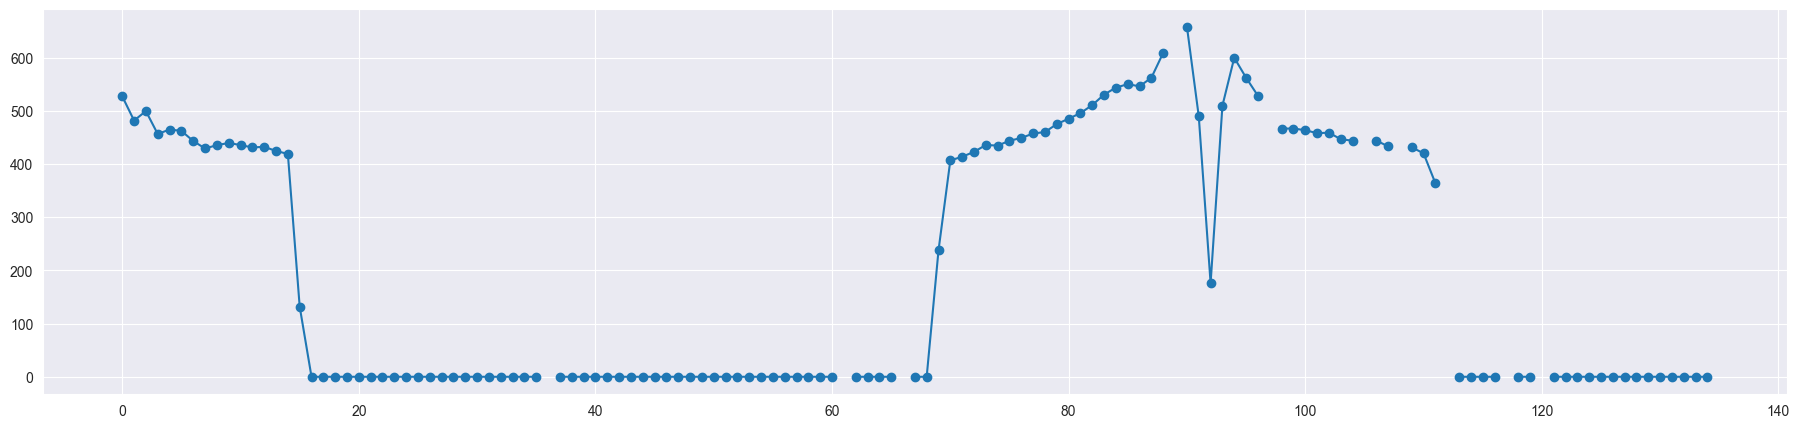

In [21]:
# Plotten Sie zum Vergleich wieder die alte und die neue Zeitreihe 
# Plot der alten Zeitreihe:
plt.figure(figsize=(22.5, 5))
rawData1['Light'].plot(marker='o')


<AxesSubplot: >

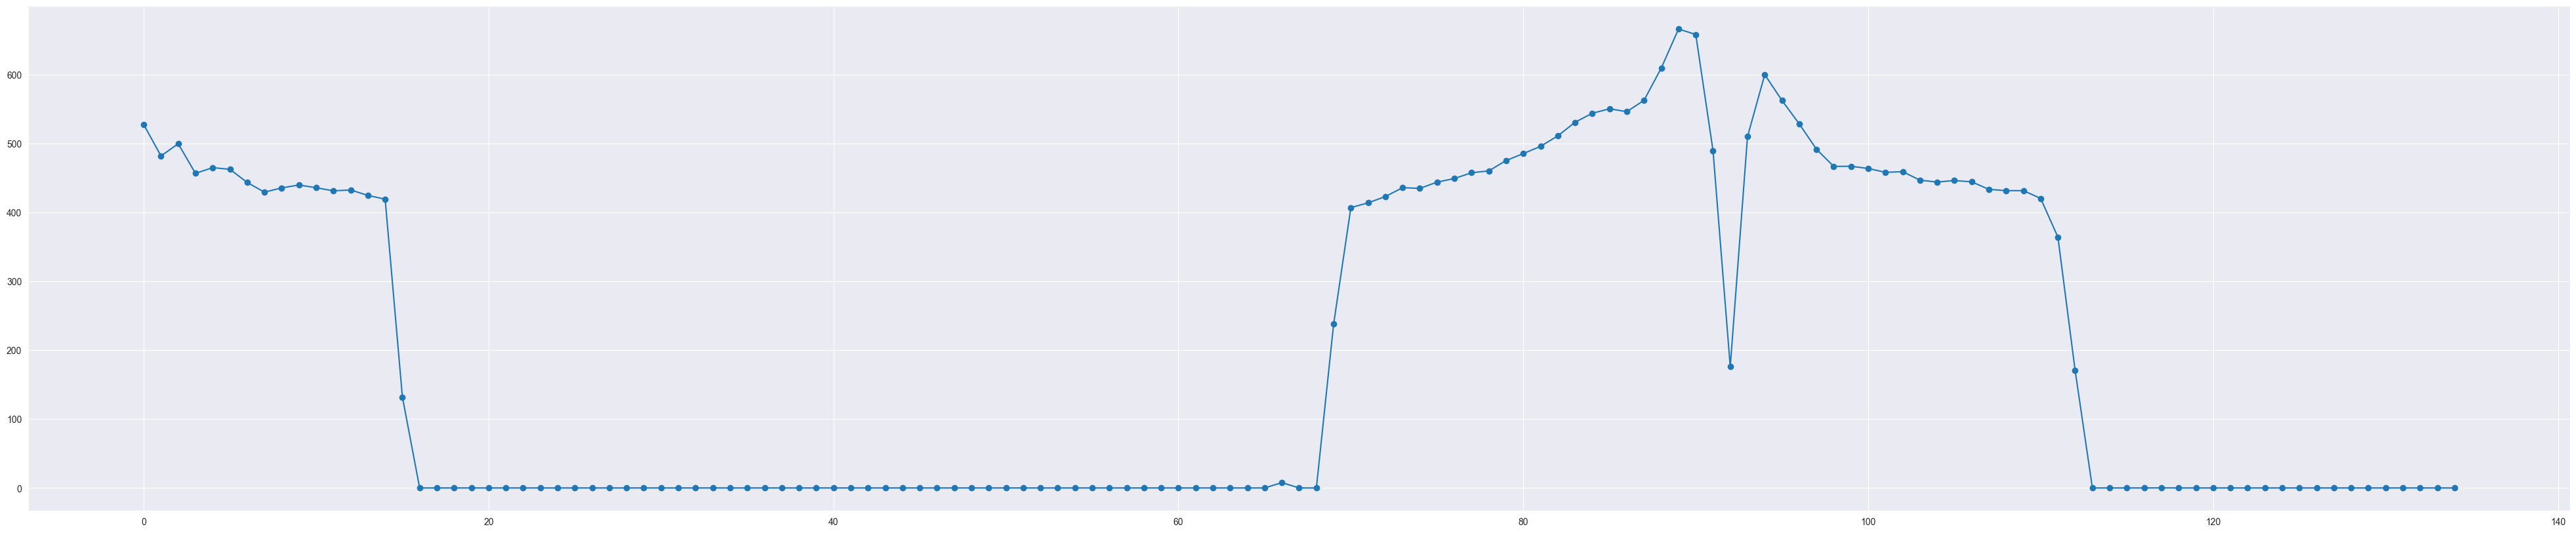

In [22]:
# Plot der neuen Zeitreihe:
plt.figure(figsize=(50, 10))
data1_pp['Light'].plot(marker='o')

Hat sich die quadratische Interpolation im Vergleich zur linearen gelohnt? Welches der beiden Interpolationsverfahren würden Sie wählen?

.......

## Zeitstempel als Index setzen
- Momentan sind die Zeilenindizes einfach durchnummeriert: 0,1,2,...
- Wenn der Zeitstempel als Index gesetzt wird, kann man einfacher arbeiten
- Dafür muss der Zeitstempel als erstes in das Format datetime gebracht werden, damit Python ihn als Zeitstempel erkennt

In [23]:
# die Spalte Date ist noch nicht im datetime Format
data1_ip.dtypes

Date          object
Energy       float64
Light        float64
CO2          float64
Occupancy    float64
dtype: object

In [24]:
# Bringen Sie die Spalte Date ins datetime Format 
data1_ip["Date"] = pd.to_datetime(data1_ip["Date"])

In [25]:
# Indizieren Sie mit der Zeitstempel-Spalte 
data1_ip.set_index("Date", inplace=True)


In [26]:
# Kontrollieren Sie das durch Ausgabe der ersten Zeilen des Datensatzes.
data1_ip.head(1)

,Energy,Light,CO2,Occupancy
Date,,,,
2015-02-02 14:15:00,26.285636,527.283333,785.951515,1.0


Wieso wird bei wiederholtem Ausführen obiger Zelle ein Fehler geworfen? Müssen Sie etwas am Code korrigieren?

....

In [27]:
# Indizieren Sie auch data2 mit dessen Zeitstempel
data2['Date'] = pd.to_datetime(data2['Date'])
data2.set_index('Date', inplace=True)

In [28]:
data2.dtypes

Temperature    float64
dtype: object

In [29]:
data2.head()

,Temperature
Date,
2015-02-02 14:00:00,23.657118
2015-02-02 15:00:00,23.293950
2015-02-02 16:00:00,22.773142
2015-02-02 17:00:00,22.534520
2015-02-02 18:00:00,21.993372


In [30]:
data1_ip.head()

,Energy,Light,CO2,Occupancy
Date,,,,
2015-02-02 14:15:00,26.285636,527.283333,785.951515,1.0
2015-02-02 14:30:00,27.016313,481.697917,894.539583,1.0
2015-02-02 14:45:00,27.612107,499.415646,992.291327,1.0
2015-02-02 15:00:00,28.006019,456.436190,1051.151905,1.0
2015-02-02 15:15:00,28.489948,464.760417,1101.779167,1.0


## Datensätze zu einem Zusammenfügen
- Problem: Die Datensätze haben unterschiedliche Frequenzen: Datensatz 1: 15min, Datensatz 2: stündlich
- Möglichkeit 1: Nur die Indizes nehmen, die sowohl in Datensatz 1, als auch in Datensatz 2 sind, also jede volle Stunde
- Möglichkeit 2: Den Datensatz mit der höheren Frequenz (Datensatz 1) runtersamplen, z.B. indem der stündliche Mittelwert oder die Summe über je eine Stunde gebildet wird

Frage: Worauf muss man aufpassen, wenn man Möglichkeit 2 wählt?

Antwort: 
....

### Möglichkeit 1: Nur die Indizes nehmen, die sowohl in Datensatz 1, als auch in Datensatz 2 sind

In [31]:
# Neuen Datensatz definieren, der aus Datensatz 2 von rechts angehängt an Datensatz 1 besteht
data = pd.concat([data1_ip, data2], axis=1)

# Dort wo keine Werte für den jeweiligen Zeitstempel vorhanden sind, werden NaN eingefügt
data.head()

,Energy,Light,CO2,Occupancy,Temperature
Date,,,,,
2015-02-02 14:00:00,NaN,NaN,NaN,NaN,23.657118
2015-02-02 14:15:00,26.285636,527.283333,785.951515,1.0,NaN
2015-02-02 14:30:00,27.016313,481.697917,894.539583,1.0,NaN
2015-02-02 14:45:00,27.612107,499.415646,992.291327,1.0,NaN
2015-02-02 15:00:00,28.006019,456.436190,1051.151905,1.0,23.293950


In [41]:
# Löschen Sie nun noch die Zeilen in denen mindestens 1x NaN vorkommt:
data.dropna(inplace=True)

# Ausgabe der ersten Zeilen von data zur Kontrolle:
data.head()

,Energy,Light,CO2,Occupancy,Temperature
Date,,,,,
2015-02-02 15:00:00,28.006019,456.436190,1051.151905,1.0,23.293950
2015-02-02 16:00:00,28.074896,429.187500,1078.897917,1.0,22.773142
2015-02-02 17:00:00,25.045857,431.085714,828.878571,1.0,22.534520
2015-02-02 18:00:00,24.919900,131.936667,782.071111,0.0,21.993372
2015-02-02 19:00:00,24.088542,0.000000,621.942708,0.0,21.276331


## Möglichkeit 2: 
- Datensatz 1 soll von 15minüten auf stündliche Werte runtergesampelt werden
- Für die Spalten Light und CO2 soll dazu der stündliche Mittelwert genommen werden
- Für die Spalte Energy soll dazu jeweils die Summe über die 4 Werte in einer Stunde gebildet werden
- Für die Spalte Occupancy soll einfach der Wert zur vollen Stunde genommen werden

In [42]:
# Ursprünglicher Datensatz
data1_ip.head()

,Energy,Light,CO2,Occupancy
Date,,,,
2015-02-02 14:15:00,26.285636,527.283333,785.951515,1.0
2015-02-02 14:30:00,27.016313,481.697917,894.539583,1.0
2015-02-02 14:45:00,27.612107,499.415646,992.291327,1.0
2015-02-02 15:00:00,28.006019,456.436190,1051.151905,1.0
2015-02-02 15:15:00,28.489948,464.760417,1101.779167,1.0


In [34]:
# Ursprünglichen Datensatz aufteilen

# nur die Spalten, die gemittelt werden sollen 
data1_mean = data1_ip.copy()
data1_mean.drop(['Energy', 'Occupancy'], axis=1, inplace=True)
data1_mean.head()

,Light,CO2
Date,,
2015-02-02 14:15:00,527.283333,785.951515
2015-02-02 14:30:00,481.697917,894.539583
2015-02-02 14:45:00,499.415646,992.291327
2015-02-02 15:00:00,456.436190,1051.151905
2015-02-02 15:15:00,464.760417,1101.779167


In [44]:
# Generieren Sie einen Datensatz data1_sum, der nur die Spalten enthält, die summiert werden sollen
data1_sum = data1_ip.copy()
data1_sum.drop(["Light", "Occupancy", "CO2"], axis=1, inplace=True)
data1_sum.head()

,Energy
Date,
2015-02-02 14:15:00,26.285636
2015-02-02 14:30:00,27.016313
2015-02-02 14:45:00,27.612107
2015-02-02 15:00:00,28.006019
2015-02-02 15:15:00,28.489948


In [47]:
# Generieren Sie einen Datensatz data1_binary, der nur die Spalten enthält, die weder gemittelt noch aufsummiert werden sollen
data1_bin = data1_ip.copy()
data1_bin.drop(["Energy", "Light", "CO2"], axis=1, inplace=True)
data1_bin.head()

,Occupancy
Date,
2015-02-02 14:15:00,1.0
2015-02-02 14:30:00,1.0
2015-02-02 14:45:00,1.0
2015-02-02 15:00:00,1.0
2015-02-02 15:15:00,1.0


In [50]:
# Bringen Sie den Datensatz data1_mean durch Mittelwertbildung auf eine höhere Frequenz (stündlich):
data1_resampled_mean = data1_mean.resample("H").mean()

# Lassen Sie sich zur Kontrolle die ersten Zeilen ausgeben:
data1_resampled_mean.head()

,Light,CO2
Date,,
2015-02-02 14:00:00,502.798965,890.927475
2015-02-02 15:00:00,456.677902,1103.590327
2015-02-02 16:00:00,434.929193,980.338952
2015-02-02 17:00:00,426.717991,821.892560
2015-02-02 18:00:00,32.984167,719.712031


In [49]:
# Bringen Sie data1_sum durch Summenbildung auf eine höhere Frequenz (stündlich). (statt .mean() verwenden Sie .sum())
data1_resampled_sum = data1_sum.resample("H", label="right").sum()
# Ausgabe der ersten Zeilen zur Kontrolle:
data1_resampled_sum.head()

,Energy
Date,
2015-02-02 15:00:00,80.914056
2015-02-02 16:00:00,113.657907
2015-02-02 17:00:00,106.986065
2015-02-02 18:00:00,99.873477
2015-02-02 19:00:00,98.368227


In [51]:
# Bringen Sie den Datensatz data1_binary auf eine höhere Frequenz (stündlich). 
# Dafür soll immer der Wert des Merkmals Occupancy zu vollen Stunde genommen werden, die anderen Werte sollen verworfen werden. 
data1_resampled_bin = data1_bin.resample("H").first()

# Ausgabe der ersten Zeilen zur Kontrolle:
data1_resampled_bin.head()

,Occupancy
Date,
2015-02-02 14:00:00,1.0
2015-02-02 15:00:00,1.0
2015-02-02 16:00:00,1.0
2015-02-02 17:00:00,1.0
2015-02-02 18:00:00,0.0


In [52]:
# Daten zusammenfügen
data = pd.concat([data2, data1_resampled_sum, data1_resampled_mean, data1_resampled_bin], axis=1)

data.head()

,Temperature,Energy,Light,CO2,Occupancy
Date,,,,,
2015-02-02 14:00:00,23.657118,NaN,502.798965,890.927475,1.0
2015-02-02 15:00:00,23.293950,80.914056,456.677902,1103.590327,1.0
2015-02-02 16:00:00,22.773142,113.657907,434.929193,980.338952,1.0
2015-02-02 17:00:00,22.534520,106.986065,426.717991,821.892560,1.0
2015-02-02 18:00:00,21.993372,99.873477,32.984167,719.712031,0.0


In [53]:
# Entfernen von Zeilen mit mind. 1x NaN falls vorhanden:
data.dropna(inplace=True)

In [54]:
# Ausgabe der ersten Zeilen von data
data.head()

,Temperature,Energy,Light,CO2,Occupancy
Date,,,,,
2015-02-02 15:00:00,23.293950,80.914056,456.677902,1103.590327,1.0
2015-02-02 16:00:00,22.773142,113.657907,434.929193,980.338952,1.0
2015-02-02 17:00:00,22.534520,106.986065,426.717991,821.892560,1.0
2015-02-02 18:00:00,21.993372,99.873477,32.984167,719.712031,0.0
2015-02-02 19:00:00,21.276331,98.368227,0.000000,585.110384,0.0


In [55]:
# Ausgabe der Anzahl NaN in den jeweiligen Spalten

data.isna().sum()

Temperature    0
Energy         0
Light          0
CO2            0
Occupancy      0
dtype: int64